# Probability

### Basic Probability Theory

#### A dice experiment

In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
from d2l import tensorflow as d2l

In [4]:
fair_probs = tf.ones(6) / 6
fair_probs, tf.reduce_sum(fair_probs)

(<tf.Tensor: shape=(6,), dtype=float32, numpy=
 array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0>)

In [9]:
# drawing single sample
tfp.distributions.Multinomial(1, fair_probs).sample()

<tf.Tensor: shape=(6,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 1.], dtype=float32)>

In [18]:
# drawing multiple samples
count = tfp.distributions.Multinomial(1000, fair_probs).sample()

In [20]:
count, count / tf.reduce_sum(count)

(<tf.Tensor: shape=(6,), dtype=float32, numpy=array([178., 139., 177., 166., 185., 155.], dtype=float32)>,
 <tf.Tensor: shape=(6,), dtype=float32, numpy=array([0.178, 0.139, 0.177, 0.166, 0.185, 0.155], dtype=float32)>)

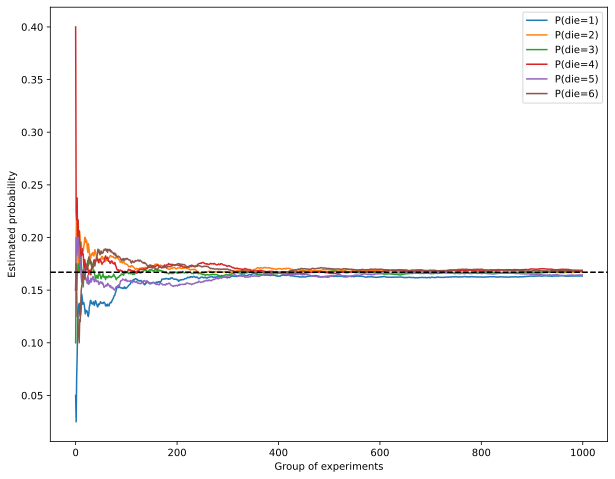

In [35]:
counts = tfp.distributions.Multinomial(20, fair_probs).sample(1000)
cum_counts = tf.cumsum(counts, axis=0)
estimates = cum_counts / tf.reduce_sum(cum_counts, axis=1, keepdims=True)

d2l.set_figsize((10, 8))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(), label=(f"P(die={str(i+1)})"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel("Group of experiments")
d2l.plt.gca().set_ylabel("Estimated probability")
d2l.plt.legend()

In [36]:
tf.cumsum(counts, axis=0)

<tf.Tensor: shape=(1000, 6), dtype=float32, numpy=
array([[1.000e+00, 3.000e+00, 2.000e+00, 8.000e+00, 3.000e+00, 3.000e+00],
       [1.000e+00, 8.000e+00, 7.000e+00, 9.000e+00, 8.000e+00, 7.000e+00],
       [4.000e+00, 1.400e+01, 9.000e+00, 1.300e+01, 1.100e+01, 9.000e+00],
       ...,
       [3.263e+03, 3.336e+03, 3.353e+03, 3.369e+03, 3.281e+03, 3.358e+03],
       [3.265e+03, 3.342e+03, 3.356e+03, 3.374e+03, 3.283e+03, 3.360e+03],
       [3.268e+03, 3.345e+03, 3.357e+03, 3.378e+03, 3.289e+03, 3.363e+03]],
      dtype=float32)>

In [37]:
tf.reduce_sum(counts, axis=1, keepdims=True)

<tf.Tensor: shape=(1000, 1), dtype=float32, numpy=
array([[20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.

In [38]:
estimates

<tf.Tensor: shape=(1000, 6), dtype=float32, numpy=
array([[0.05      , 0.15      , 0.1       , 0.4       , 0.15      ,
        0.15      ],
       [0.025     , 0.2       , 0.175     , 0.225     , 0.2       ,
        0.175     ],
       [0.06666667, 0.23333333, 0.15      , 0.21666667, 0.18333334,
        0.15      ],
       ...,
       [0.16347696, 0.16713427, 0.16798598, 0.16878757, 0.16437876,
        0.16823648],
       [0.16341342, 0.16726726, 0.16796798, 0.16886887, 0.16431431,
        0.16816817],
       [0.1634    , 0.16725   , 0.16785   , 0.1689    , 0.16445   ,
        0.16815   ]], dtype=float32)>

In [39]:
tf.reduce_sum(estimates, axis=1, keepdims=True)

<tf.Tensor: shape=(1000, 1), dtype=float32, numpy=
array([[1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.99999994],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.99999994],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.99999994],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
    